# PAP2 V253: Apsorption von $\alpha$-, $\beta$- & $\gamma$-Strahlen

Aufgabe 1: Absorption von $\beta$-Strahlung

($n − n^{β}_{0}$) wird über der Absorberdicke x im halblogarithmischen Diagramm auf- getragen. Aus diesem Diagramm wird die maximale Reichweite von β-Strahlung in Aluminium bestimmt, indem man auf diejenige Absorberdicke extrapoliert, bei der die Absorptionskurve nahezu senkrecht verlaufen würde. Der Fehler der Maximalreichweite wird durch eine Fehlerkurve abgeschätzt.

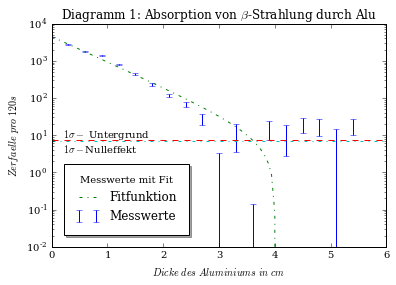

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np


#Daten einlesen, in Tabelle zuvor alle Werte auf Torzeit 120s umgerechnet
t, d, z = np.loadtxt('tab1.txt', skiprows=1, unpack=True)
dz = np.sqrt(z)

#Der Untergrund n_beta_null ist der letzte Tabellenwert, auf 2 min Zeitbasis: 
U = 58 

#Für Plot verwendeter 1-Sigma Untergrund als Kennlinine
def Us(x):
    return np.sqrt(U) + 0*x

#1-Sigma Untergrund der Nulleffektmessung
def U1(x):
    return np.sqrt(48) + 0*x

def fit_func(x, n_0, my, y0):
    return n_0*np.exp(-my*x) + y0


from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func, d, (z-U), sigma=dz)
ar=np.linspace(0,6,num=100) #mehr x Werte für Plot der Fitfunktion
#popt, pcov=curve_fit(fit_func, t, N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)

plt.errorbar(d,(z-U), dz, linestyle='None', label='Messwerte') 
plt.plot(ar,fit_func(ar,*popt), label='Fitfunktion', linestyle='-.')
plt.plot(ar, Us(ar), linestyle='--')
plt.plot(ar, U1(ar), linestyle='-.')
plt.xlabel('$Dicke\ des\ Aluminiums\ in\ cm$') 
plt.ylabel('$Zerfaelle\ pro\ 120s $')
plt.title(u'Diagramm 1: Absorption von $\\beta$-Strahlung durch Alu') 
plt.yscale('log')
#plt.axis((0, 415, 10, 1000))
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='lower left', shadow='true')
plt.text(0.2, 9, u'$1\sigma-$ Untergrund', fontsize=10)
plt.text(0.2, 3.5, u'$1\sigma-$Nulleffekt', fontsize=10)
plt.savefig('v253_1.pdf',format='pdf')

Aufgabe 2: Absorption von $\gamma$-Strahlung

('Beste Werte: ', array([-0.57468969,  4.36530501]))
('Fehler: ', array([ 0.01073896,  0.03176628]))


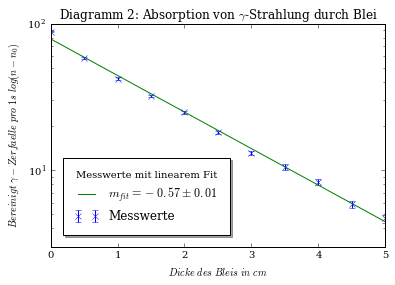

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

#Einlesen der Daten
d, zahl = np.loadtxt('tab2.txt', skiprows=1, unpack=True)

#Berechnen des Untergrundes (Nulleffekt auf 1s normieren)
n0 = 0.397    #Nulleffekt durch 60*5 Sekunden
dn0 = 0.0364 #1-Sigma Fehler des Nulleffktes durch 60*5 Sekunden

#Damit errechnet sich Zählrate
r = (zahl/60 - n0)

#Fehler der Zählrate
dr = np.sqrt((np.sqrt(zahl)/60)**2+(dn0)**2)

#Lineare Fitfunktion an die Daten
def linear(x, m, t): 
    return m*x + t

#Daten an Funktion fitten
popt, pcov = curve_fit(linear, dicke, np.log(r))
perr = np.sqrt(np.diag(pcov))
print('Beste Werte: ', popt)
print ('Fehler: ', perr)

# Plotten der Daten in Lin-Log Diagramm
plt.xlabel('$Dicke\ des\ Bleis\ in\ cm$') 
plt.ylabel('$Bereinigt\ \gamma-Zerfaelle\ pro\ 1s\ log(n - {{n_0}}) $')
plt.title(u'Diagramm 2: Absorption von $\\gamma$-Strahlung durch Blei') 
plt.yscale('log')
plt.ylim(3, 10**2)
plt.errorbar(d, r, yerr=dr, fmt='x', label='Messwerte')
plt.plot(d, np.exp(linear(d, *popt)), label='$m_{fit}=%.2f \pm%.2f$' %(popt[0], perr[0]))
plt.legend(title='Messwerte mit linearem Fit', borderpad=1, borderaxespad=1, loc='lower left', shadow='true')
plt.savefig('v253_2.pdf', format='pdf')

Aufgabe 3: Absorption von $\alpha$-Strahlung

[  23.  122.  217.  316.  359.  385.  420.  454.  486.  518.  624.  725.]
[ -0.02942753  17.17252328]
[ 0.00166495  0.78404806]


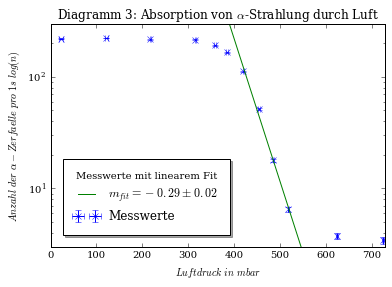

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

#Einlesen der Daten: Druck p, dessen Fehler dp, Zählrate bei 60s Torzeit
p, dp, n = np.loadtxt('tab4.txt', skiprows=1, unpack=True)

#Fehlerberechnung
r=n/60 #Normierung: Zählrate durch Torzeit 60s teilen
dr= np.sqrt(n)/60 #Fehler der Rate: Fehler der Zählrate durch Torzeit
print (p)

#Lineare Fitfunktion an die Daten
def linear(x, m, t): 
    return m*x + t 

#Fitten der Daten im linearen Bereich
popt, pcov = curve_fit(linear, p[6:10], np.log(r[6:10]))
perr = np.sqrt(np.diag(pcov))
print(popt)
print (perr)

plt.yscale('log')
plt.xlabel('$Luftdruck\ in\ mbar$') 
plt.ylabel('$Anzahl\ der\ \\alpha-Zerfaelle\ pro\ 1s\ log(n)$')
plt.title(u'Diagramm 3: Absorption von $\\alpha$-Strahlung durch Luft') 
plt.axis((0, 730, 3, 300))
plt.errorbar(p, r, yerr=dr, xerr=dp, fmt='x', label='Messwerte')
plt.plot(p, np.exp(linear(p, *popt)), label='$m_{fit}=%.2f \pm%.2f$' %(popt[0]*10, perr[0]*10))
plt.legend(title='Messwerte mit linearem Fit', borderpad=1, borderaxespad=1, loc='lower left', shadow='true')
plt.savefig('v253_3.pdf', format='pdf')
